## Reading FILES

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mpd

from netCDF4 import Dataset as nc
from netCDF4 import num2date
import matplotlib.colors as colors
from datetime import datetime
from datetime import timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## SIMPLE text files (data organize into columns)

In [17]:
filename='/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/co2_mm_mlo.txt'
#load data from a txt file
X=np.loadtxt(filename)
print(np.shape(X))
print(type(X))

(690, 7)
<class 'numpy.ndarray'>


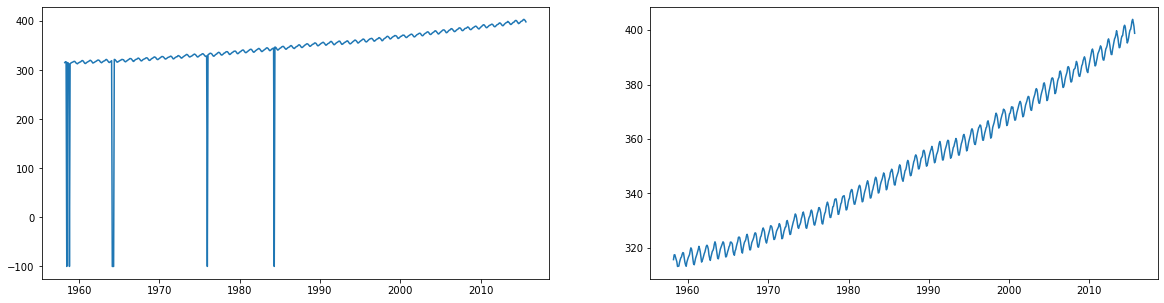

In [20]:
co2avg=X[:,3]
date=X[:,2]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(X[:,2],X[:,3])
#we take off outliers that are aprroximatively equal to -99
ax2.plot(date[co2avg>-1],co2avg[co2avg>-1])

# Numpy Masked Arrays

In [21]:
#mask an array where the condtion is met
co2avg_mask=np.ma.masked_where(X[:,3]<-1,co2avg)
print(type(co2avg_mask))
co2avg_mask[:4]

<class 'numpy.ma.core.MaskedArray'>


masked_array(data=[315.71, 317.45, 317.5, --],
             mask=[False, False, False,  True],
       fill_value=1e+20)

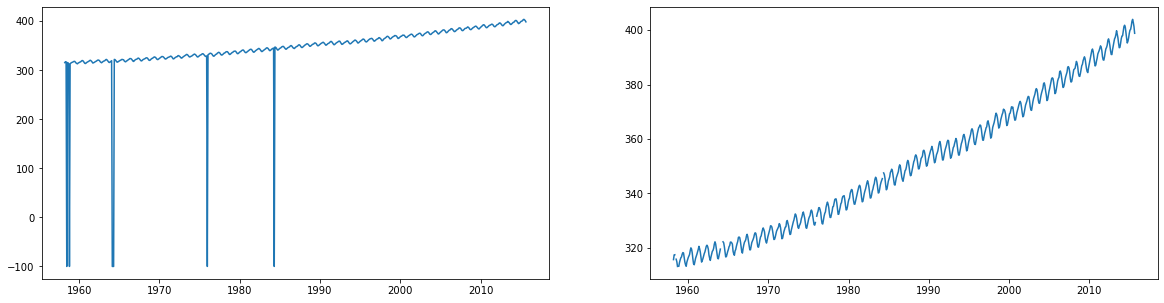

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(X[:,2],X[:,3])
ax2.plot(X[:,2],co2avg_mask)

In [23]:
print(np.mean(co2avg[:4]))
print(np.mean(co2avg_mask[:4]))

212.6675
316.88666666666666


## Save and read data quickly

In [26]:
np.save('co2avg',co2avg)
B=np.load('co2avg.npy')

In [27]:
#1st way  to check that 2 arrays are the same
np.min(B==co2avg)
#2nd way  to check that 2 arrays are the same
np.max(np.abs(B-co2avg))

0.0

## Reading NETCDF files 

SST file on the Benguela Region

In [28]:
filesst='/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/odyssea.nc'
ncf = nc(filesst, mode='r')
print(ncf.file_format)
print(ncf.dimensions.keys())
print(ncf.variables.keys())

NETCDF4
dict_keys(['lon', 'lat', 'time'])
dict_keys(['lon', 'lat', 'time', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction'])


In [29]:
ncf = nc(filesst, mode='r')
lonsst = ncf['lon'][:]
latsst = ncf['lat'][:]
sstval=ncf['analysed_sst'][0]-273.15
ssterr=ncf['analysis_error'][0]
sstmask=ncf['mask'][0]
ncf.close()

In [30]:
print(np.shape(lonsst))
print(np.shape(latsst))

(400,)
(650,)


<ipython-input-18-3a65aa8cfeb8>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lonsst,latsst,sstval)


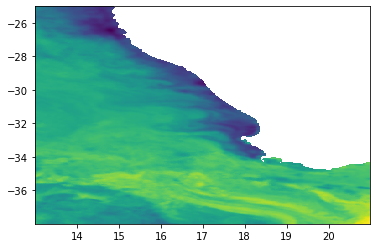

In [18]:
plt.pcolor(lonsst,latsst,sstval)

In [31]:
Lonsst,Latsst=np.meshgrid(lonsst,latsst)
print(np.shape(Lonsst))
print(np.shape(Latsst))

(650, 400)
(650, 400)


In [32]:
print(np.shape(sstval))

(650, 400)


Some plotting

<ipython-input-33-31b3ff558540>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im3=ax3.pcolor(Lonsst,Latsst,sstval,cmap=plt.cm.Spectral_r)


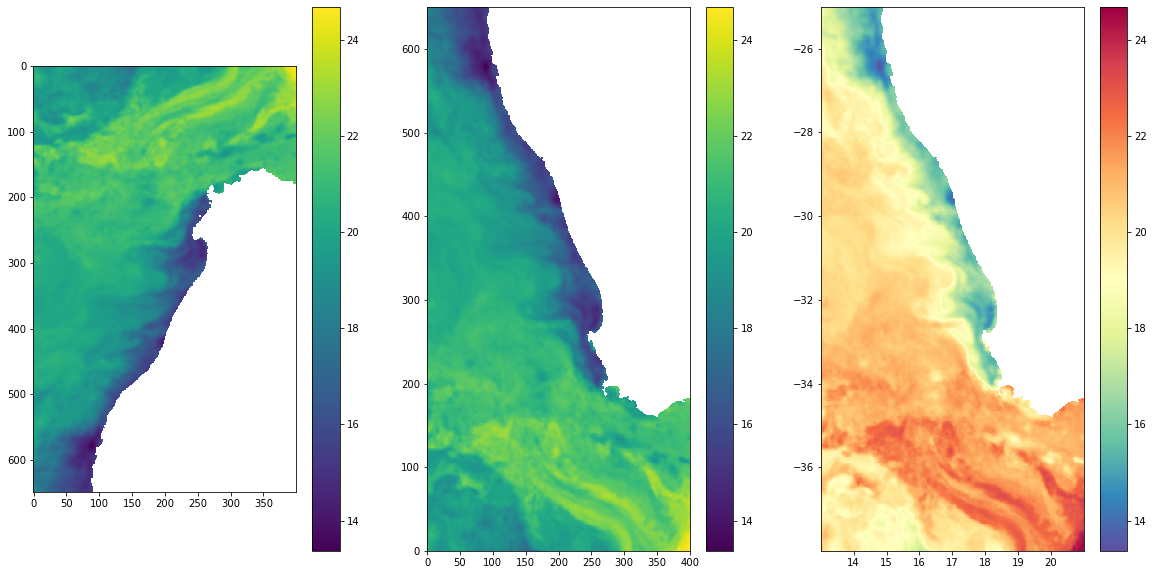

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
#fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
im1=ax1.imshow(sstval)
fig.colorbar(im1, ax=ax1)
im2=ax2.pcolor(sstval)
fig.colorbar(im2,ax=ax2)
im3=ax3.pcolor(Lonsst,Latsst,sstval,cmap=plt.cm.Spectral_r)
fig.colorbar(im3,ax=ax3)

# Extract sub-domain

In [22]:
lonsub=lonsst[(lonsst>15)&(lonsst<18)]
latsub=latsst[(latsst>-34)&(latsst<-32)]
sstsub=sstval[(latsst>-34)&(latsst<-32),:][:,(lonsst>15)&(lonsst<18)]
Latsub=Latsst[(latsst>-34)&(latsst<-32),:][:,(lonsst>15)&(lonsst<18)]
Lonsub=Lonsst[(latsst>-34)&(latsst<-32),:][:,(lonsst>15)&(lonsst<18)]


<ipython-input-23-52fa2902fa16>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1=ax1.pcolor(Lonsst,Latsst,sstval)
<ipython-input-23-52fa2902fa16>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2=ax2.pcolor(Lonsub,Latsub,sstsub)


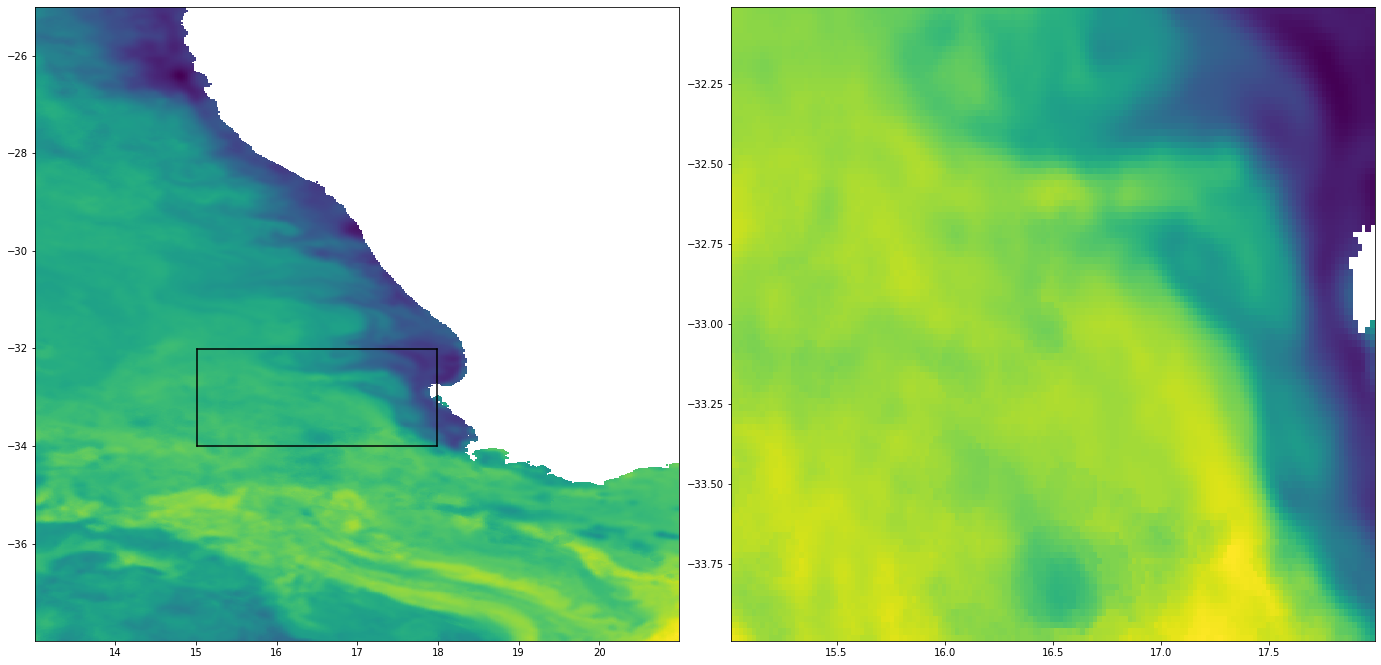

In [23]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.08)
im1=ax1.pcolor(Lonsst,Latsst,sstval)

min_lon2=np.min(Lonsub)
max_lon2=np.max(Lonsub)
min_lat2=np.min(Latsub)
max_lat2=np.max(Latsub)

#on a deux tableaux (x,y) et (x,y) que l'on agrège ensemble pour ploter 
# *zip permet de dézipper des tuples, ici on considère qu'ils sont déjà zippés
ax1.plot(*zip(np.array((min_lon2,min_lat2)),np.array((min_lon2,max_lat2))),'k-')
ax1.plot(*zip(np.array((min_lon2,min_lat2)),np.array((max_lon2,min_lat2))),'k-')
ax1.plot(*zip(np.array((max_lon2,min_lat2)),np.array((max_lon2,max_lat2))),'k-')
ax1.plot(*zip(np.array((min_lon2,max_lat2)),np.array((max_lon2,max_lat2))),'k-')

im2=ax2.pcolor(Lonsub,Latsub,sstsub)



# Calculating gradient of SST

In [34]:
R= 6371.008*10**3
distx2=R*np.cos(latsst[:,np.newaxis]*np.pi/180)*(lonsst[np.newaxis,1:]-lonsst[np.newaxis,:-1])*np.pi/180

disty2=R*(latsst[1:,np.newaxis]-latsst[:-1,np.newaxis])*np.pi/180*np.ones((1,350))
print(disty2.shape)

(649, 350)


In [35]:
R= 6371.008*10**3
N=sstval.shape[0]
M=sstval.shape[1]
dsst_x=np.zeros((N,M-1))
for i in range(N):
    for j in range(M-1):
        dx=R*np.cos(0.5*(Latsst[i,j+1]+Latsst[i,j])*np.pi/180)*(Lonsst[i,j+1]-Lonsst[i,j])*np.pi/180
        dsst_x[i,j]=(sstval[i,j+1]-sstval[i,j])/dx

<ipython-input-35-58a2639ca722>:8: UserWarning: Warning: converting a masked element to nan.
  dsst_x[i,j]=(sstval[i,j+1]-sstval[i,j])/dx


In [36]:
dsst_x2=np.zeros((N,M-1))
for j in range(M-1):
    dx=R*np.cos(0.5*(Latsst[:,j+1]+Latsst[:,j])*np.pi/180)*(Lonsst[:,j+1]-Lonsst[:,j])*np.pi/180
    dsst_x2[:,j]=(sstval[:,j+1]-sstval[:,j])/dx

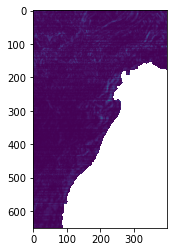

In [37]:
plt.imshow(np.abs(dsst_x2-dsst_x))

In [38]:
dsst_x3=np.zeros((N,M-1))
dx=R*np.cos(0.5*(Latsst[:,1:]+Latsst[:,:-1])*np.pi/180)*(Lonsst[:,1:]-Lonsst[:,:-1])*np.pi/180
dsst_x3=(sstval[:,1:]-sstval[:,:-1])/dx

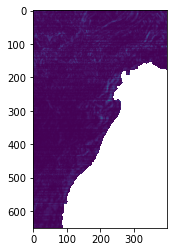

In [39]:
plt.imshow(np.abs(dsst_x3-dsst_x))

In [40]:
dsst_y=np.zeros((N-1,M))
for i in range(N-1):
    for j in range(M):
        dy=R*np.pi/180*(Latsst[i+1,j]-Latsst[i,j])
        dsst_y[i,j]=(sstval[i+1,j]-sstval[i,j])/dy

<ipython-input-40-1eb9bd6a1d10>:5: UserWarning: Warning: converting a masked element to nan.
  dsst_y[i,j]=(sstval[i+1,j]-sstval[i,j])/dy


In [41]:
dsst_y2=np.zeros((N-1,M))
for i in range(N-1):
    dy=R*np.pi/180*(Latsst[i+1,:]-Latsst[i,:])
    dsst_y2[i,:]=(sstval[i+1,:]-sstval[i,:])/dy

In [42]:
dsst_y3=np.zeros((N-1,M))
dy=R*np.pi/180*(Latsst[1:,:]-Latsst[:-1,:])
dsst_y2=(sstval[1:,:]-sstval[:-1,:])/dy

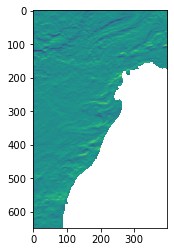

In [43]:
plt.imshow(dsst_y-dsst_y2)

In [44]:
dsst=np.sqrt((0.5*(dsst_x[1:,:]+dsst_x[:-1,:]))**2 +  (0.5*(dsst_y[:,1:]+dsst_y[:,:-1]))**2)

In [34]:
dsst.shape

(649, 399)

In [45]:
Longrad=0.25*(Lonsst[:-1,:-1]+Lonsst[:-1,1:]+Lonsst[1:,1:]+Lonsst[1:,:-1])
Latgrad=0.25*(Latsst[:-1,:-1]+Latsst[:-1,1:]+Latsst[1:,1:]+Latsst[1:,:-1])

<ipython-input-46-c86f6c719911>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(Longrad,Latgrad,dsst)


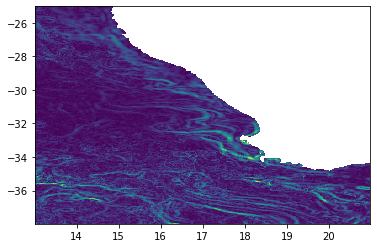

In [46]:
plt.pcolor(Longrad,Latgrad,dsst)

In [47]:
np.shape(Lonsst)

(650, 400)

In [48]:
np.shape(dsst)

(649, 399)

## Plotting Maps 

In [49]:
latcity = [-33.918861]
loncity = [18.423300]
cities = ['Cape Town']

/home/audreyhyeans/miniconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


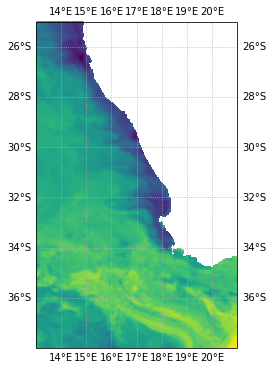

In [50]:
proj = ccrs.PlateCarree() 
fig = plt.figure(figsize=(10,6))
lonmin=np.min(Lonsst)
latmin=np.min(Latsst)
lonmax=np.max(Lonsst)
latmax=np.max(Latsst)
ax  = plt.axes(projection=proj,extent=[lonmin,lonmax,latmin,latmax])
ctf = ax.pcolor(Lonsst,Latsst,sstval)
ax.gridlines(linestyle=':',draw_labels=True) 

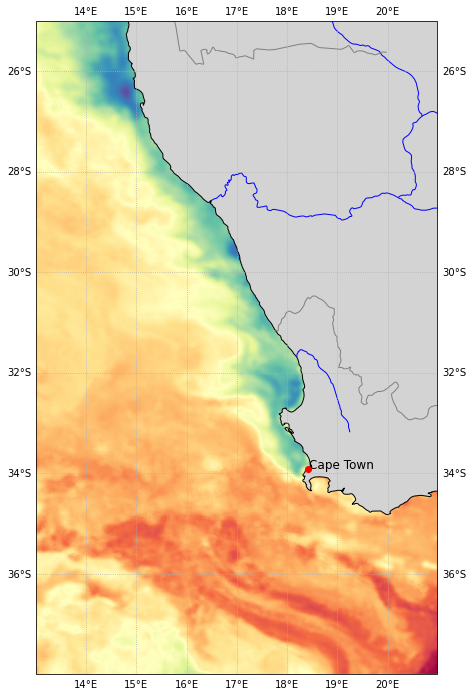

In [51]:
proj = ccrs.PlateCarree()                            # Choose the projection

cmap = plt.cm.get_cmap('Spectral_r')                 # Choose the colormap

land_10m = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='10m',
        edgecolor='k',
        facecolor='lightgrey')

states_provinces = cfeature.NaturalEarthFeature(
		category='cultural',
		name='admin_1_states_provinces_lines',
        scale='10m',
        edgecolor='gray',
        facecolor='none')

rivers = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='10m',
        edgecolor='blue',
        facecolor='none')

lonmin=np.min(Lonsst)
latmin=np.min(Latsst)
lonmax=np.max(Lonsst)
latmax=np.max(Latsst)

fig = plt.figure(figsize=(20,12))
ax  = plt.axes(projection=proj,extent=[lonmin,lonmax,latmin,latmax])
#ax.add_feature(cfeature.LAND) # Land color
#ax.add_feature(cfeature.COASTLINE)# Add coastlines

ax.add_feature(land_10m)
ax.add_feature(rivers)
ax.add_feature(states_provinces)
ax.gridlines(linestyle=':',draw_labels=True)         # Add gridlines

for lon, lat, city in zip(loncity, latcity, cities):
    ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.01, lat + 0.01, city, fontsize='large',
                transform=ccrs.PlateCarree())


# ~ Plot SST
ctf = ax.pcolor(Lonsst,Latsst,sstval,cmap=cmap)


# SST file on the Breizh Region

In [4]:
file='/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/20090601_103103-metop.nc'
ncf=nc(file,'r')
ncf.variables.keys()

NameError: name 'nc' is not defined

In [53]:
file='/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/20090601_103103-metop.nc'
ncf=nc(file,'r')
lon = ncf.variables['lon'][:]
lat = ncf.variables['lat'][:]
sst=ncf.variables['EUR_L2P_AVHRR_METOP_A_sea_surface_temperature'][:]-273.15
ncf.variables.keys()

dict_keys(['time', 'lon', 'lat', 'EUR_L2P_AVHRR_METOP_A_sst_dtime', 'EUR_L2P_AVHRR_METOP_A_time', 'EUR_L2P_AVHRR_METOP_A_lat', 'EUR_L2P_AVHRR_METOP_A_lon', 'EUR_L2P_AVHRR_METOP_A_sea_surface_temperature', 'EUR_L2P_AVHRR_METOP_A_SSES_bias_error', 'EUR_L2P_AVHRR_METOP_A_SSES_standard_deviation_error', 'EUR_L2P_AVHRR_METOP_A_satellite_zenith_angle', 'EUR_L2P_AVHRR_METOP_A_solar_zenith_angle', 'EUR_L2P_AVHRR_METOP_A_rejection_flag', 'EUR_L2P_AVHRR_METOP_A_confidence_flag', 'EUR_L2P_AVHRR_METOP_A_proximity_confidence', 'EUR_L2P_AVHRR_METOP_A_sea_ice_fraction', 'EUR_L2P_AVHRR_METOP_A_sources_of_sea_ice_fraction', 'EUR_L2P_AVHRR_METOP_A_aerosol_optical_depth', 'EUR_L2P_AVHRR_METOP_A_aod_dtime_from_sst', 'EUR_L2P_AVHRR_METOP_A_sources_of_aod', 'EUR_L2P_AVHRR_METOP_A_wind_speed', 'EUR_L2P_AVHRR_METOP_A_wind_speed_dtime_from_sst', 'EUR_L2P_AVHRR_METOP_A_sources_of_wind_speed', 'EUR_L2P_AVHRR_METOP_A_surface_solar_irradiance', 'EUR_L2P_AVHRR_METOP_A_ssi_dtime_from_sst', 'EUR_L2P_AVHRR_METOP_A_sou

<ipython-input-55-614fcb86fa1d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2=ax2.pcolor(lon,lat,sst,cmap=plt.cm.Spectral,vmin=12,vmax=23)


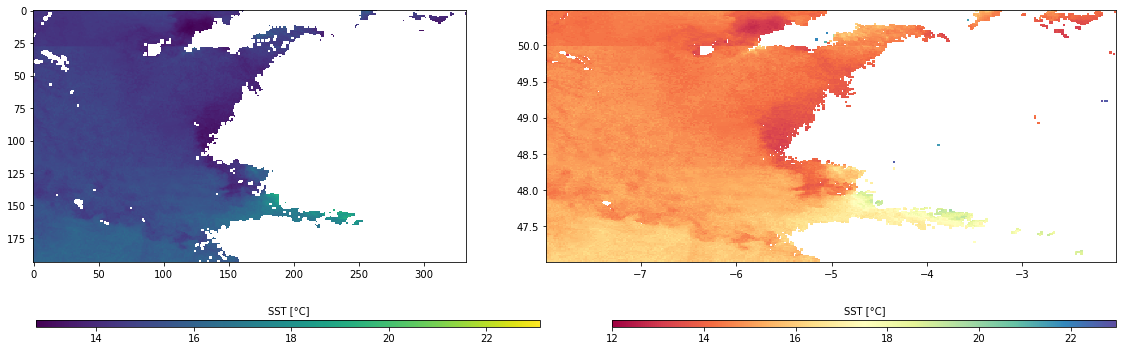

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
im1=ax1.imshow(sst)
im2=ax2.pcolor(lon,lat,sst,cmap=plt.cm.Spectral,vmin=12,vmax=23)

fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.02)

wc1,hc1  = 0.35,0.02
xc1,yc1  = 0.15,0.02
cax1    = fig.add_axes([xc1,yc1,wc1,hc1])
cb1     = plt.colorbar(im1,cax1,orientation='horizontal',ticks=np.arange(12,23,2))
cb1.set_label(r'SST [°C]',fontsize=10,labelpad=-38)
cb1.ax.tick_params(labelsize=10)

wc2,hc2  = 0.35,0.02
xc2,yc2  = 0.55,0.02
cax2    = fig.add_axes([xc2,yc2,wc2,hc2])
cb2     = plt.colorbar(im2,cax2,orientation='horizontal',ticks=np.arange(12,23,2))
cb2.set_label(r'SST [°C]',fontsize=10,labelpad=-38)
cb2.ax.tick_params(labelsize=10)

In [56]:
np.shape(sst)

(194, 333)

In [57]:
lonmin,lonmax = np.floor(np.min(lon)),np.ceil(np.max(lon))
latmin,latmax = np.floor(np.min(lat)),np.ceil(np.max(lat))

lonmin,lonmax = -8,-2.
latmin,latmax =47,51.

proj = ccrs.PlateCarree()                            # Choose the projection
cmap = plt.cm.get_cmap('Spectral_r')                 # Choose the colormap

land_10m = cfeature.NaturalEarthFeature(
		category='physical',
		name='land',
		scale='10m',
		edgecolor='k',
		facecolor='lightgrey')
states_provinces = cfeature.NaturalEarthFeature(
		category='cultural',
		name='admin_1_states_provinces_lines',
        scale='10m',
        edgecolor='gray',
        facecolor='none')
rivers = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='10m',
        edgecolor='blue',
        facecolor='none')




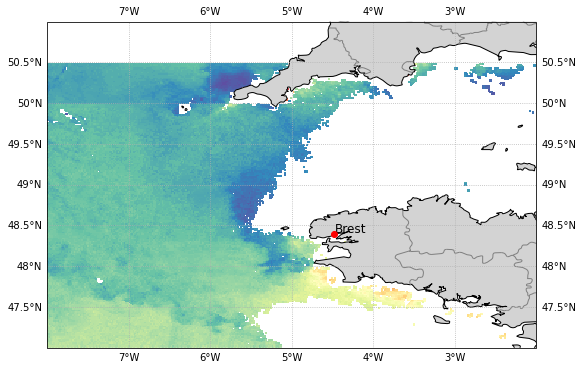

In [58]:
fig = plt.figure(figsize=(10,6))
ax  = plt.axes(projection=proj,extent=[lonmin,lonmax,latmin,latmax])
                       # Land color

# Add coastlines
ax.add_feature(land_10m)
ax.add_feature(rivers)
ax.add_feature(states_provinces)
#ax.add_feature(cfeature.COASTLINE) 
# Add gridlines
ax.gridlines(linestyle=':',draw_labels=True) 

lonbrest=[-4-28/60-59.99/3600]
latbrest=[48+24/60]
city=['Brest']
ax.plot(lonbrest[0],latbrest[0], 'ro', zorder=5,transform=ccrs.PlateCarree())
ax.text(lonbrest[0] + 0.01, latbrest[0] + 0.01, city[0], fontsize='large',transform=ccrs.PlateCarree())

current_cmap = plt.cm.get_cmap('Spectral_r')
ctf = ax.pcolor(lon,lat,sst,cmap=current_cmap)

In [62]:
#plt.plot?

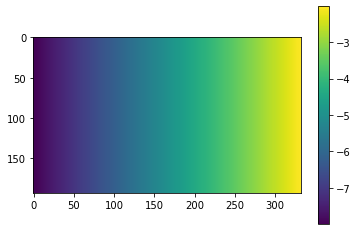

In [63]:
plt.imshow(lon)
plt.colorbar()

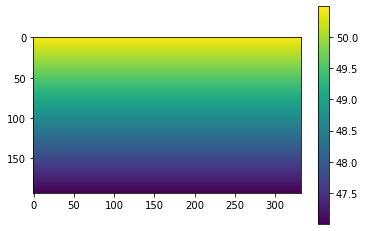

In [61]:
plt.imshow(lat)
plt.colorbar()

## COMPLEX TEXT FILES

In [65]:
file='/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/161201000005.log'
f=open(file, encoding='utf-8',errors='ignore')
#lit toutes les lignes, une part une 
line=f.readline()
print(line)


spy udp port 49000



In [66]:
line=f.readline()
print(line)

server: sockfd = 3



In [67]:
for i in range(10):
    print(f.readline())

server: bindno = 0

161201000005:336240,$INGGA,000005.20,2752.44880,S,04554.17204,E,1,14,00.9,016.565,M,0.0,M,0.0,0000*47



161201000005:336396,$INVTG,300.08,T,306.96,M,005.74,N,010.64,K,D*32



161201000005:336450,$INHDT,306.96,T*1F



161201000005:336497,$INMWV,059.1,T,12.72,N,A*37



161201000005:553865,$WIMWV,61,T,13.0,N,A*3E



In [52]:
line=f.readline()
print(line)

-go back to line 0

In [68]:
#on revient à la ligne 0
f.seek(0)

0

In [69]:
line=f.readline()
print(line)

spy udp port 49000



In [70]:
f.seek(3)
line=f.readline()
print(line)

 udp port 49000



In [71]:
#fermer le fichier
f.close()

In [72]:
print(f.readline())

ValueError: I/O operation on closed file.

-Looping through lines

In [73]:
f=open(file, encoding='utf-8',errors='ignore')
for i in range(6):
    line=f.readline()
    print(line)
f.close()

spy udp port 49000

server: sockfd = 3

server: bindno = 0

161201000005:336240,$INGGA,000005.20,2752.44880,S,04554.17204,E,1,14,00.9,016.565,M,0.0,M,0.0,0000*47



161201000005:336396,$INVTG,300.08,T,306.96,M,005.74,N,010.64,K,D*32



- Retrieving information from one line

In [74]:
f=open(file, encoding='utf-8',errors='ignore')
for i in range(48):
    line=f.readline()

f.close()    
print(line)


161201000007:808868,$MXDBT,6437.45,f,1962.14,M,1072.91,F,*38



In [75]:
#line.strip fait une ligne de caractère
#vu que la ligne est déjà une chaine de caractère don cpas besoin du split
line.strip().split(':')[0][:2]

'16'

In [76]:
line.strip().split(':')[1]

'808868,$MXDBT,6437.45,f,1962.14,M,1072.91,F,*38'

In [77]:
line.strip().split(',')[4]

'1962.14'

In [78]:
float(line.strip().split(',')[4])

1962.14

In [79]:
type(line)

str

In [80]:
a=[]
a.append(line.strip().split(',')[4])
print(a)

['1962.14']


In [81]:
a=[]
a.append(float(line.strip().split(',')[4]))
print(a)

[1962.14]


In [82]:
if "INGGA" in line:
    print("line is good")

In [83]:
a=[]
a.append(line.strip())
print(a)

['161201000007:808868,$MXDBT,6437.45,f,1962.14,M,1072.91,F,*38']


### Go through all the line one by one 

In [84]:
with open(file,encoding='utf-8',errors='ignore') as f:
    for line in f:
        a=line

print(a)

steven@



In [85]:
print(line)

steven@



-Read through all the file (one line after the other)
- And Extract the bathymetry
- Store in a list
- in a numpy array

In [86]:
bathy=[]
bathytime=[]
with open(file,encoding='utf-8',errors='ignore') as f:
    for line in f:
        #on cherche si MXDBT est dans la ligne concernée
        if "MXDBT" in line:
            bathy.append(float(line.strip().split(',')[4]))
            bathytime.append(line.strip().split(':')[0])
#on transforme la liste en array
bathy=np.asanyarray(bathy)
print(bathy)

[1962.14 1961.54 1961.73 ... 1757.16 1785.26 1802.2 ]


In [87]:
bathytime[0]

'161201000007'

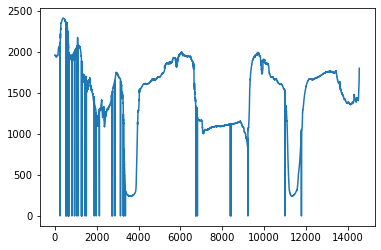

In [88]:
plt.plot(bathy)

# Create a date object

In [2]:
#on le convertit en date
print(bathytime[0])
year=2000+int(bathytime[0][:2])
print(year)
month=int(bathytime[0][2:4])
print(month)
day=int(bathytime[0][4:6])
print(day)
hour=int(bathytime[0][6:8])
print(hour)
minut=int(bathytime[0][8:10])
print(minut)
sec=int(bathytime[0][10:12])
print(sec)
datebathy=datetime(year,month,day,hour,minut,sec)

NameError: name 'bathytime' is not defined

In [90]:
print(datebathy)
type(datebathy)

2016-12-01 00:00:07


datetime.datetime

In [1]:
bathy=[]
datebathy=[]
with open(file,encoding='utf-8',errors='ignore') as f:
    for line in f:
        if "MXDBT" in line:
            bathy.append(float(line.strip().split(',')[4]))
            bathytime=line.strip().split(':')[0]
            year=2000+int(bathytime[:2])
            month=int(bathytime[2:4])
            day=int(bathytime[4:6])
            hour=int(bathytime[6:8])
            minut=int(bathytime[8:10])
            sec=int(bathytime[10:12])
            datebathy.append(datetime(year,month,day,hour,minut,sec))
            
bathy=np.asanyarray(bathy)
print(bathy)


NameError: name 'file' is not defined

In [92]:
np.empty((1,2),dtype='object')

array([[None, None]], dtype=object)

In [93]:
type(datebathy[0])

datetime.datetime

In [94]:
NMEA_files
filename

NameError: name 'NMEA_files' is not defined

In [95]:
echobathy=[]
echodate=[]
capdir=[]
capdirtime=[]
gpslat=[]
gpslon=[]
gpstime=[]
gpsdate=[]
gga=[]
ibat=0
icap=0
igps=0
file='/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/161201000005.log'
NMEA_files=[file]
for filename in NMEA_files:
    print(file)
    file=filename
    with open(file,encoding='utf-8',errors='ignore') as f:
        try:
            for line in f:
                if "MXDBT" in line:
                    echobathy.append(float(line.strip().split(',')[4:5][0]))
                    echotime = line.strip().split(':')[0:1][0]
                    year=2000+int(echotime[:2])
                    month=int(echotime[2:4])
                    day=int(echotime[4:6])
                    hour=int(echotime[6:8])
                    minut=int(echotime[8:10])
                    sec=int(echotime[10:12])
                    echodate.append(datetime(year,month,day,hour,minut,sec))
                    ibat+=1
        except UnicodeDecodeError:
            print('UnicodeDecodeError')
            continue
            
    with open(file,encoding='utf-8',errors='ignore') as f:
        try:
            for line in f:
                if "INVTG" in line:
                    capdir.append(float(line.strip().split(',')[2:3][0]))
                    capdirtime.append(float(line.strip().split(':')[0:1][0]))
                    icap+=1
        except UnicodeDecodeError:
            print('UnicodeDecodeError')
            continue
            
    with open(file,encoding='utf-8',errors='ignore') as f:
        try:
            for line in f:
                if ("INGGA" in line):
                    lattmpdeg=float(line.strip().split(',')[3][:2])
                    lattmpmin=float(line.strip().split(',')[3][2:])
                    lattmpdir=line.strip().split(',')[4]
                    if lattmpdir=='S':
                        gpslat.append(-lattmpdeg-lattmpmin/60.)
                    else:
                        gpslat.append(lattmpdeg+lattmpmin/60.)
                    lontmpdeg=float(line.strip().split(',')[5][:3])
                    lontmpmin=float(line.strip().split(',')[5][3:])
                    lontmpdir=line.strip().split(',')[6]
                    if lontmpdir=='W':
                        gpslon.append(-lontmpdeg-lontmpmin/60.)
                    else:
                        gpslon.append(lontmpdeg+lontmpmin/60.)   
                    gpstime = line.strip().split(':')[0:1][0]
                    year=2000+int(gpstime[:2])
                    month=int(gpstime[2:4])
                    day=int(gpstime[4:6])
                    hour=int(gpstime[6:8])
                    minut=int(gpstime[8:10])
                    sec=int(gpstime[10:12])
                    gpsdate.append(datetime(year,month,day,hour,minut,sec))
                    igps+=1
        except UnicodeDecodeError:
            print('UnicodeDecodeError')
            continue
ngps=ibat
nbathy=igps

/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/161201000005.log


In [96]:
for filename in NMEA_files:
    print(file)
    file=filename
    with open(file,encoding='utf-8',errors='ignore') as f:
        try:
            for line in f:
                if "MXDBT" in line:
                    echobathy.append(float(line.strip().split(',')[4:5][0]))
                    echotime = line.strip().split(':')[0:1][0]
                    year=2000+int(echotime[:2])
                    month=int(echotime[2:4])
                    day=int(echotime[4:6])
                    hour=int(echotime[6:8])
                    minut=int(echotime[8:10])
                    sec=int(echotime[10:12])
                    echodate.append(datetime(year,month,day,hour,minut,sec))
                    ibat+=1
        except UnicodeDecodeError:
            print('UnicodeDecodeError')
            continue

/home/audreyhyeans/Bureau/Master1POC/Science_Programming/cartopy_and_read_files/161201000005.log


In [97]:
len(gpslon)

86397

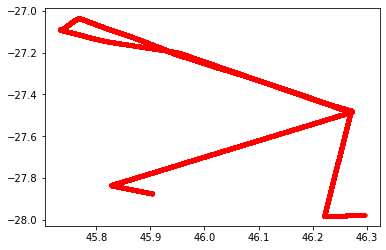

In [98]:
plt.plot(gpslon,gpslat,'r.')


In [99]:
#convert date
#julien à date
def jd_to_date(jd,date_ref):
    date = [date_ref+timedelta(days=x) for x in jd]
    return date
#gregorien vers julien
def greg_to_jd (dategreg,dateref):
    tmp = dategreg-dateref
    return np.float(tmp.days) + np.float(tmp.seconds)/86400
dateref = datetime(1950,1,1)

2016-12-01 00:00:07


<ipython-input-99-7a4ad200a4d0>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(tmp.days) + np.float(tmp.seconds)/86400


[datetime.datetime(2016, 12, 1, 0, 0, 5), datetime.datetime(2016, 12, 1, 0, 0, 6), datetime.datetime(2016, 12, 1, 0, 0, 7), datetime.datetime(2016, 12, 1, 0, 0, 8), datetime.datetime(2016, 12, 1, 0, 0, 9), datetime.datetime(2016, 12, 1, 0, 0, 10), datetime.datetime(2016, 12, 1, 0, 0, 11), datetime.datetime(2016, 12, 1, 0, 0, 12), datetime.datetime(2016, 12, 1, 0, 0, 13), datetime.datetime(2016, 12, 1, 0, 0, 14)]
[datetime.datetime(2016, 12, 1, 0, 0, 7), datetime.datetime(2016, 12, 1, 0, 0, 12)]


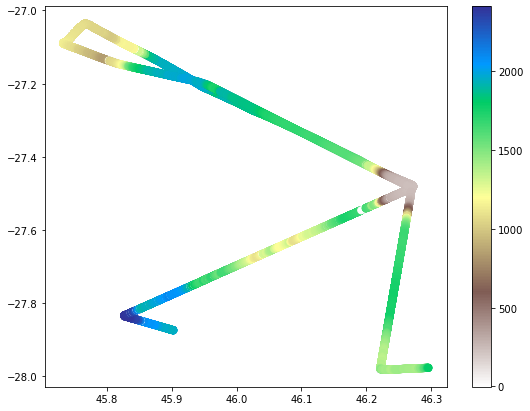

In [100]:
dateref = datetime(1950,1,1)
print(echodate[0])

gpsjuld = np.zeros(len(gpsdate))
for it in range(len(gpsdate)):
    gpsjuld[it]= greg_to_jd(gpsdate[it], dateref)
    
echojuld = np.zeros(len(echodate))
for it in range(len(echodate)):
    echojuld[it]= greg_to_jd(echodate[it], dateref)

print(gpsdate[:10])
print(echodate[0:2])
index_echo_insertinto_gps  = np.searchsorted(gpsjuld, echojuld)
index_echo_insertinto_gps[0]
gpslon = np.array(gpslon)
gpslat = np.array(gpslat)

plt.figure(figsize = (9,7))
plt.scatter(gpslon[index_echo_insertinto_gps], gpslat[index_echo_insertinto_gps], s = 50, c = echobathy, cmap=plt.cm.terrain_r)
plt.colorbar()
plt.show()

# plot y as a function of x, x b eing a datetime object

In [101]:
print(np.shape(gpslat))
print(np.shape(echobathy))

(86397,)
(29124,)


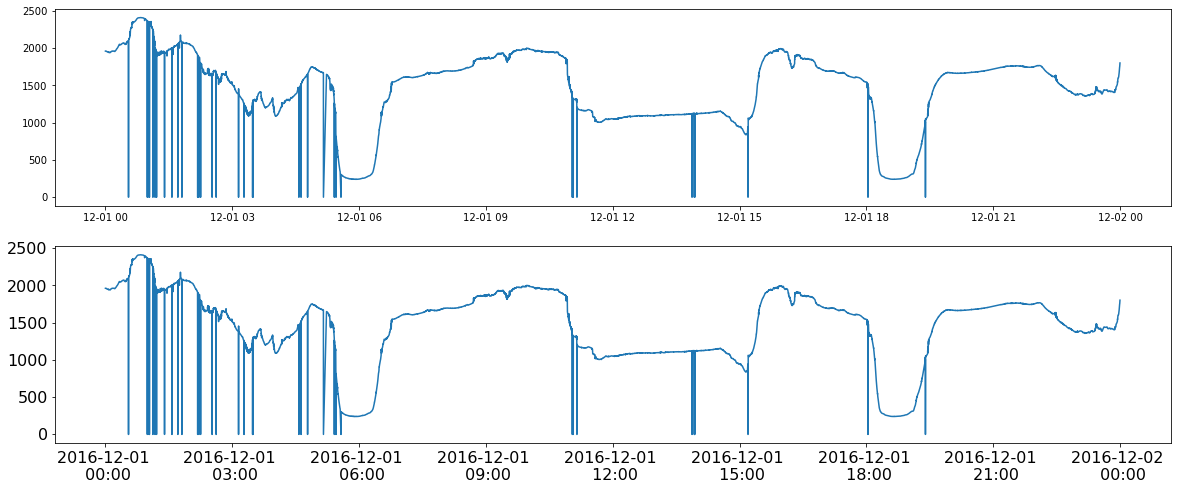

In [102]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,8))
ax1.plot(datebathy,bathy)

ax2.plot(datebathy,bathy)
hfmt = mpd.DateFormatter('%Y-%m-%d \n %H:%M')
ax2.xaxis.set_major_formatter(hfmt)



for tickLabel in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    tickLabel.set_fontsize(fontsize = 16)


In [103]:
type(datebathy)

list

In [104]:
bathygood=bathy[bathy>0]
datebathy=np.asanyarray(datebathy)
datebathygood=datebathy[bathy>0]

- Get rid of the bad values

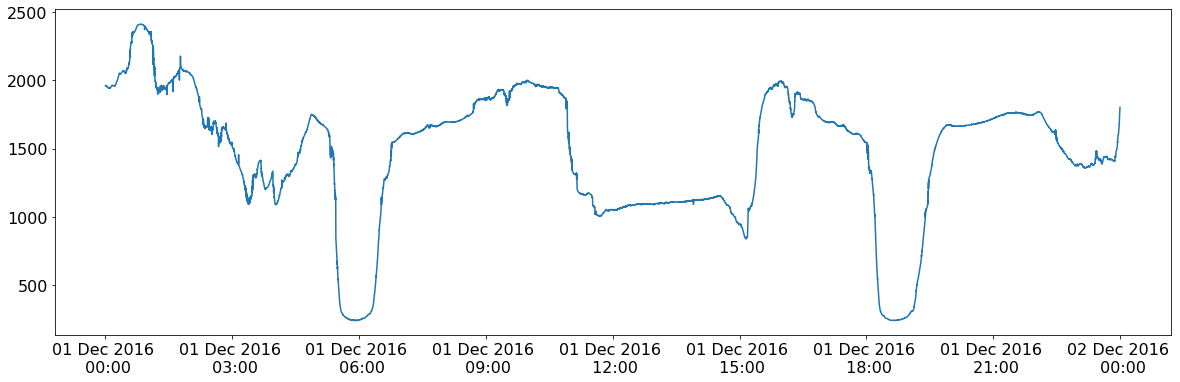

In [105]:


fig,ax=plt.subplots(1,1,figsize=(20,6))
ax.plot(datebathygood,bathygood)

hfmt = mpd.DateFormatter('%Y-%m-%d \n %H:%M')
hfmt = mpd.DateFormatter('%d %b %Y \n %H:%M')
ax.xaxis.set_major_formatter(hfmt)



for tickLabel in (ax.get_xticklabels() + ax.get_yticklabels()):
    tickLabel.set_fontsize(fontsize = 16)


In [106]:
np.median(np.array([0,1,1000,1,5,6]))

3.0

In [107]:
m=5
i=1000
print(bathygood[i-m//2:i+m//2+1])
bathymed=np.zeros_like(bathy)
bathymed[i]=np.median(bathygood[i-m//2:i+m//2+1])

print(bathymed[i])

[2031.74 2035.1  2034.95 2035.09 2036.54]
2035.09


## Running Median filter with size m=5
- Method 1 with loop

In [108]:
m=5
bathymedian=np.zeros_like(bathy)
for i in np.arange(m//2,np.size(bathy)-m//2):
    bathymedian[i]=np.median(bathy[i-m//2:i+m//2+1])

bathymedian[0]=np.median(bathy[:m//2+1])
bathymedian[1]=np.median(bathy[:m//2+2])
bathymedian[-2]=np.median(bathy[-m//2-1:])
bathymedian[-1]=np.median(bathy[-m//2:])

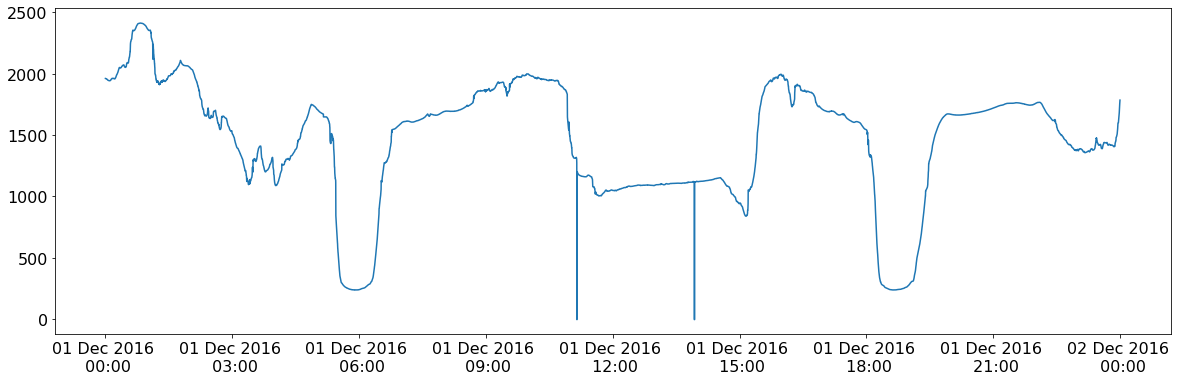

In [109]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
ax.plot(datebathy,bathymedian)

hfmt = mpd.DateFormatter('%Y-%m-%d \n %H:%M')
hfmt = mpd.DateFormatter('%d %b %Y \n %H:%M')
ax.xaxis.set_major_formatter(hfmt)



for tickLabel in (ax.get_xticklabels() + ax.get_yticklabels()):
    tickLabel.set_fontsize(fontsize = 16)

In [126]:
def median_filt1(a,m):
    medianarray=np.zeros_like(a)
    for i in np.arange(m//2,np.size(a)-m//2):
        medianarray[i]=np.median(a[i-m//2:i+m//2+1])
    medianarray[0]=np.median(a[:m//2+1])
    medianarray[1]=np.median(a[:m//2+2])
    medianarray[-2]=np.median(a[-m//2-1:])
    medianarray[-1]=np.median(a[-m//2:])
    return medianarray

In [127]:
%timeit(median_filt1(bathy,m=5))

UsageError: Line magic function `%timeit(median_filt1(bathy,m=5))` not found.


- Method 2 

In [ ]:
m=5
tmp=np.zeros((m,np.size(bathy)))
tmp[0,:]=bathy
tmp[1,m//2-1:]=bathy[:-1]
tmp[1,:m//2-1]=np.nan
tmp[2,m//2:]=bathy[:-2]
tmp[2,:m//2]=np.nan
tmp[3,:-1]=bathy[1:]
tmp[3,-1]=np.nan
tmp[4,:-2]=bathy[2:]
tmp[4,-2:]=np.nan
bathymedian2=np.median(tmp,axis=0)

                  

In [ ]:
tmp[:2]

In [ ]:
def median_filt2(a,m):
    tmp=np.zeros((m,np.size(a)))
    tmp[0,:]=a
    tmp[1,m//2-1:]=a[:-1]
    tmp[1,:m//2-1]=np.nan
    tmp[2,m//2:]=a[:-2]
    tmp[2,:m//2]=np.nan
    tmp[3,:-1]=a[1:]
    tmp[3,-1]=np.nan
    tmp[4,:-2]=a[2:]
    tmp[4,-2:]=np.nan
    return np.median(tmp,axis=0)

In [ ]:
%timeit(median_filt2(bathy,m=5))

In [ ]:
nw=5
m = np.repeat(bathy[np.newaxis,:],nw+1,axis=0)
for i in range(1,nw//2+1):
    m[i,:-i] = m[i,i:]
    m[i,-i:] = np.nan
    m[nw//2+i,i:] = m[nw//2+i,:-i]
    m[nw//2+i,:i] = np.nan

In [ ]:
np.max(m[0,:]-bathy)
m[:,:5]

In [112]:
def homemade_median_filter(x,nw):
    m = np.repeat(x[np.newaxis,:],nw+1,axis=0)
    for i in range(1,nw//2+1):
        m[i,:-i] = m[i,i:]
        m[i,-i:] = np.nan
        m[nw//2+i,i:] = m[nw//2+i,:-i]
        m[nw//2+i,:i] = np.nan
        
    m[-1,:] = np.nanmedian(m[:-1,:],axis=0)
    return m[-1]

In [113]:
bathymedian3=homemade_median_filter(bathy,nw=5)

In [114]:
%timeit(homemade_median_filter(bathy,nw=5))

UsageError: Line magic function `%timeit(homemade_median_filter(bathy,nw=5))` not found.


In [115]:
from scipy import signal
bathymedian4=signal.medfilt(bathy,5)

In [116]:
%timeit(signal.medfilt(bathy,5))

UsageError: Line magic function `%timeit(signal.medfilt(bathy,5))` not found.


In [ ]:
signal.medfilt?

In [ ]:
print(tmp[:,:5])

In [ ]:
print(tmp[:,-5:])

In [ ]:
m=5
m//2

In [ ]:
np.size(bathy)-m//2

NameError: name 'bathymedian2' is not defined

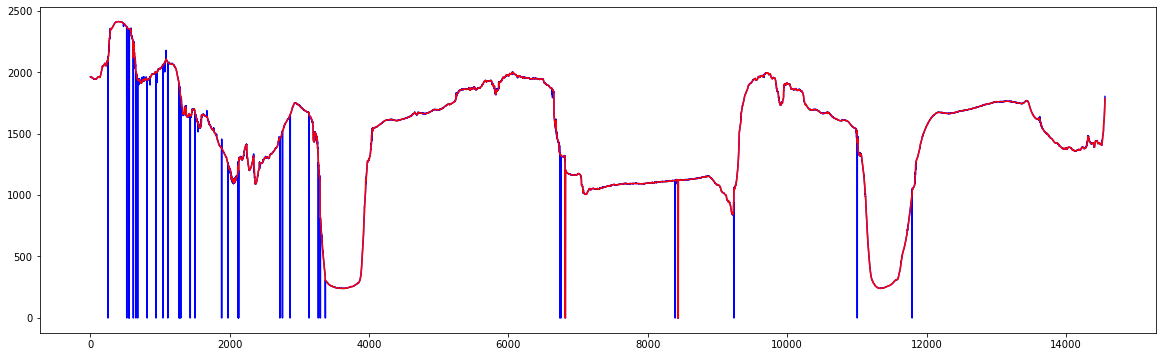

In [117]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
ax.plot(bathy,'b-')
ax.plot(bathymedian,'r-')
ax.plot(bathymedian2,'g-')
ax.plot(bathymedian3,'k-')
ax.plot(bathymedian4,'m-')

In [ ]:
np.max(np.abs(bathymedian4-bathymedian)
       [~np.isnan(np.abs(bathymedian4-bathymedian))])

In [ ]:
np.median?

In [118]:
bathymedian[2]-bathymedian2[2]

NameError: name 'bathymedian2' is not defined

In [119]:
i=2
bathy[i-m//2:i+m//2+1]

array([1962.14, 1961.54, 1961.73, 1961.11, 1961.32])

### Point on broadcasting

In [120]:
#broadcasting
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
print(a[:, np.newaxis] )
print(a[np.newaxis, :])

[[ 0.]
 [10.]
 [20.]
 [30.]]
[[ 0. 10. 20. 30.]]


In [121]:
#reshape
a.reshape(4,1)
a.reshape(1,4)

array([[ 0., 10., 20., 30.]])

In [122]:
def dist_spheric2(lat1,lon1,lat2,lon2): # function that takes angles in deg
    R= 6371.008*10**3
    l=np.abs(lon2-lon1)
    if l>180:
        l=360-l
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    l=np.radians(l)
    dist=R*np.arctan2(np.sqrt((np.sin(l)*np.cos(lat2))**2 \
                        +(np.sin(lat2)*np.cos(lat1) \
                         -np.cos(lat2)*np.sin(lat1)*np.cos(l))**2 \
                        ),
                          np.sin(lat2)*np.sin(lat1)+\
                          np.cos(lat2)*np.cos(lat1)*np.cos(l) \
                          )                    
    return dist

In [123]:
tps = np.array([2,3,4])
print(tps[np.newaxis,:])
print(tps[:,np.newaxis])

[[2 3 4]]
[[2]
 [3]
 [4]]


In [124]:
def dist_spheric_matrix(lat1,lon1): 
    R= 6371.008*10**3
    lon1 = np.radians(lon1)
    l=np.abs(lon1[np.newaxis,:]-lon1[:,np.newaxis])
    lat1 = np.radians(lat1)
    l[l>np.pi] = 2*np.pi-l
    #lat2 = np.radians(lat2)
    l=np.radians(l)
    dist=R*np.arctan2(np.sqrt((np.sin(l)*np.cos(lat1[np.newaxis,:]))**2 \
                        +(np.sin(lat2[:,np.newaxis])*np.cos(lat1[np.newaxis,:]) \
                         -np.cos(lat2[:,np.newaxis])*np.sin(lat1[np.newaxis,:])*np.cos(l))**2 \
                        ),
                          np.sin(lat2[:,np.newaxis])*np.sin(lat1[np.newaxis,:])+\
                          np.cos(lat2[:,np.newaxis])*np.cos(lat1[np.newaxis,:])*np.cos(l) \
                          )                    
    return dist

In [125]:
#dist2 = dist_spheric_matrix(lat1,lon1)